**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [1]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [2]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [3]:
model = ExchangeEconomyClass()

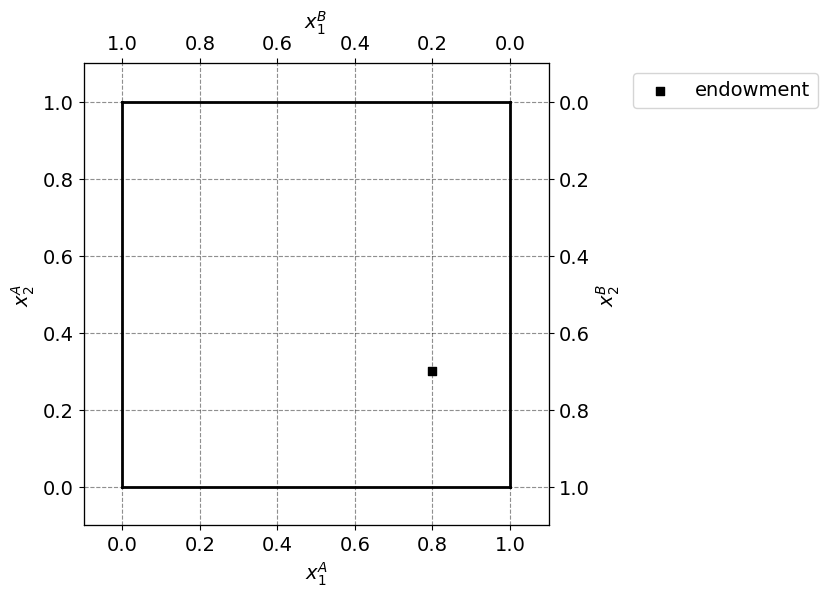

In [4]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

0.41601676461038084 0.30365889718756617
[(0.08108108108108109, 0.945945945945946), (0.08108108108108109, 0.9594594594594595), (0.0945945945945946, 0.8783783783783784), (0.0945945945945946, 0.8918918918918919), (0.0945945945945946, 0.9054054054054055), (0.0945945945945946, 0.918918918918919), (0.0945945945945946, 0.9324324324324325), (0.0945945945945946, 0.945945945945946), (0.0945945945945946, 0.9594594594594595), (0.10810810810810811, 0.8243243243243243), (0.10810810810810811, 0.8378378378378379), (0.10810810810810811, 0.8513513513513514), (0.10810810810810811, 0.8648648648648649), (0.10810810810810811, 0.8783783783783784), (0.10810810810810811, 0.8918918918918919), (0.10810810810810811, 0.9054054054054055), (0.10810810810810811, 0.918918918918919), (0.10810810810810811, 0.9324324324324325), (0.10810810810810811, 0.945945945945946), (0.10810810810810811, 0.9594594594594595), (0.12162162162162163, 0.7702702702702703), (0.12162162162162163, 0.7837837837837838), (0.12162162162162163, 0.7

TypeError: list indices must be integers or slices, not tuple

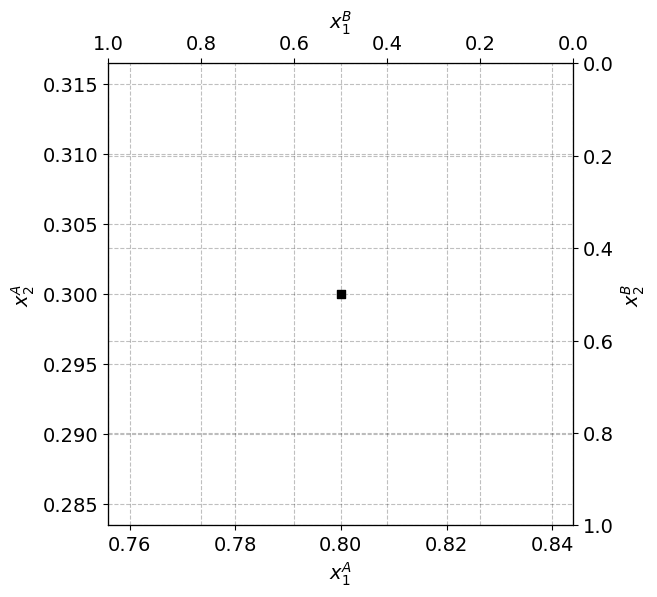

In [5]:
import numpy as np
#set initial endowments
w_1a=0.8
w_2a=0.3

#assume walras law applies to the market equilibrium
w_1b=1-w_1a
w_2b=1-w_2a

#specify utility functions for consumer A and B:
def u_A(x1,x2,alpha=1/3):
    return x1**alpha*x2**(1-alpha)
def u_B(x1,x2,beta=2/3):
    return x1**beta*x2**(1-beta)

#utility of initial endowments
u_A_intial=u_A(w_1a, w_2a)
u_B_initial=u_B(w_1b, w_2b)
print(u_A_intial, u_B_initial)

#make grid for x1a and x2a with N=75 ticks 
N = 75
x1A_grid = np.linspace(0, 1, N)
x2A_grid = np.linspace(0, 1, N)

#make empty list for the pareto optimal combinations of goods for consumer A and consumer B
pareto=[]

for x1a in x1A_grid:
    for x2a in x2A_grid:
        x1b = 1-x1a
        x2b = 1-x2a
        if u_A(x1a,x2a)>=u_A_intial and u_B(x1b, x2b) >= u_B_initial:
            pareto.append((x1a, x2a))
print(pareto)

#array
np.array(pareto)

#make a plot
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

#pareto allocations
plt.plot(pareto[:, 0], pareto[:, 1], 'o', label='Pareto-improving Allocations')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));